## steps 
## 1-import libraries and load data and split data into train val 
## 2-data visulization and eda 
## 3- data cleaning and prepration 
## 4- model selection 
## 5- submit test data  into kaggle 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ALNOUR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.
Data Fields

datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

## First data file 

In [2]:
## read train data
data=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\train.csv")

## read test data 
test_data=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\test.csv")
test_data2=pd.read_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\test.csv")

## save train data on acopy 
data2=data.copy()

In [3]:
data2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## I want  to split data into Train data And Validation data 

In [4]:
x=data2.drop(["count"],axis=1)
y=data2["count"]
from sklearn.model_selection import train_test_split

train_x,val_x,train_y,val_y = train_test_split(x,y, test_size=0.2, random_state=0)
val_data=pd.concat([val_x,val_y],axis=1)

In [5]:
train_x.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,94,217
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0,2


## Now let me made  exploare train data EDA

In [6]:
## first i wii join train_x with train_y to made me  explorae data 
train_data=pd.concat([train_x,train_y],axis=1)
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3662,2011-09-03 12:00:00,3,0,0,1,28.70,32.575,61,15.0013,97,160,257
8648,2012-08-02 17:00:00,3,0,1,1,33.62,38.635,52,16.9979,90,775,865
7053,2012-04-12 06:00:00,2,0,1,1,12.30,14.395,65,16.9979,2,94,96
2685,2011-06-19 19:00:00,2,0,0,1,29.52,34.090,62,8.9981,94,217,311
5927,2012-02-03 04:00:00,1,0,1,1,10.66,12.880,60,15.0013,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2011-11-15 13:00:00,4,0,1,3,22.14,25.760,60,15.0013,21,132,153
3264,2011-08-05 22:00:00,3,0,1,1,28.70,32.575,65,15.0013,51,137,188
9845,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368,617
10799,2012-12-16 09:00:00,4,0,0,2,14.76,17.425,87,8.9981,19,113,132


In [7]:
##  let me see information about data 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 3662 to 2732
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 884.4+ KB


## i did not find any missing value on any column !!! 
## all data types is good but data is object!!!!

In [8]:
### let me show describe of data statstical summary about data 
### categorical column like season holiday weather not faire to appear here do not look at them
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.496899,0.029513,0.679835,1.413413,20.151585,23.566106,61.778824,12.848368,35.888723,154.966812,190.855535
std,1.118607,0.169249,0.466567,0.628714,7.772519,8.461146,19.201010,8.242156,49.837535,150.871639,180.852259
min,1.000000,0.000000,0.000000,1.000000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.750000,7.001500,4.000000,36.000000,43.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.000000,117.000000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,222.000000,285.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## let me see traget column   and relation between numeric column and target column by using scatter plot 

<AxesSubplot:xlabel='count'>

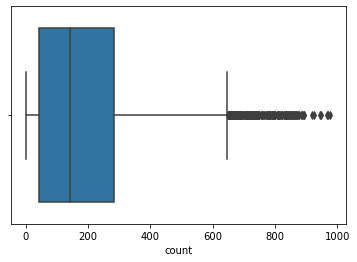

In [9]:
## first i  want to see if the target colunm contain outliers or not i will draw boxplot 
sns.boxplot(x="count",data=train_data)

### from box plot  i can say that  most of the data almost  lies between 30 and 300 and  we find a huge number of outliers  after 600

<AxesSubplot:xlabel='count', ylabel='Count'>

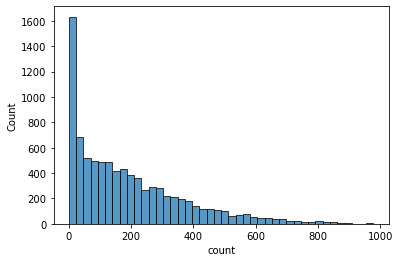

In [10]:
## let me draw historam to count colum to see it is distribuation 
sns.histplot(x="count",data=train_data)

## look at this it is right skewed i think this happened because outliers effect

## Now let me see scatter plot count and numeric features 


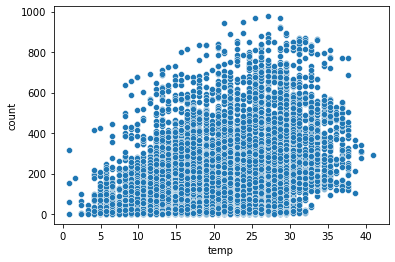

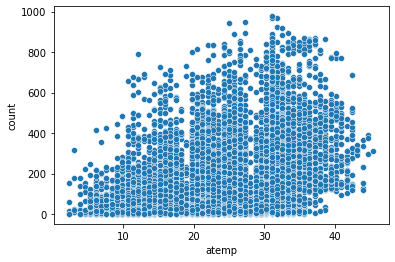

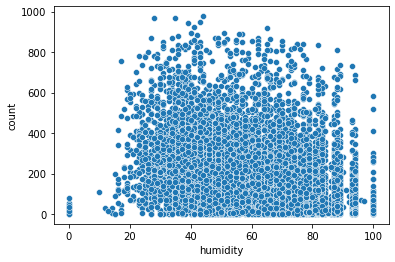

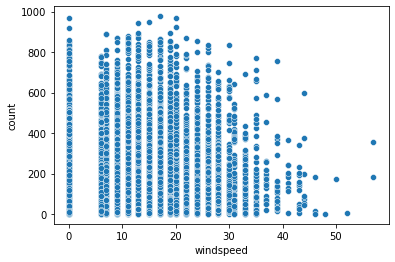

In [11]:
## let me create list have numeric columns without caluse and registred column becauese count derived
##from them caluse+regis=count
features=[f for f in train_data.columns]
features=features[5:-3]
for f in features:
    sns.scatterplot(x=str(f),y="count",data=train_data)
    plt.show()

<AxesSubplot:xlabel='temp', ylabel='atemp'>

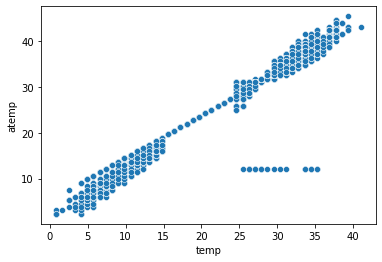

In [12]:
sns.scatterplot(x="temp",y="atemp",data=train_data)

In [13]:
train_data[(train_data["temp"]>25) &(train_data["temp"]<40) & (train_data["atemp"]>10) &(train_data["atemp"]<20)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36
9004,2012-08-17 13:00:00,3,0,1,1,34.44,12.12,36,26.0027,103,254,357
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54
9009,2012-08-17 18:00:00,3,0,1,2,33.62,12.12,38,16.9979,108,561,669
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9
9007,2012-08-17 16:00:00,3,0,1,2,34.44,12.12,32,30.0026,116,372,488
9011,2012-08-17 20:00:00,3,0,1,2,29.52,12.12,58,15.0013,97,262,359
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668
9002,2012-08-17 11:00:00,3,0,1,1,31.16,12.12,52,19.0012,98,205,303


## from  thisis distibutions i can say that  the relation between count and numeric columns is weak or not specific

## let me draw plot between count and categorical data 


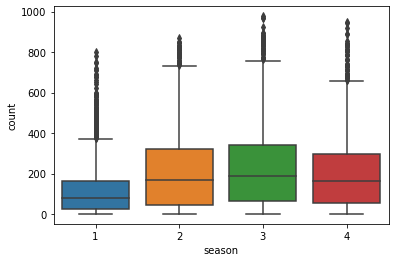

<AxesSubplot:xlabel='season', ylabel='count'>

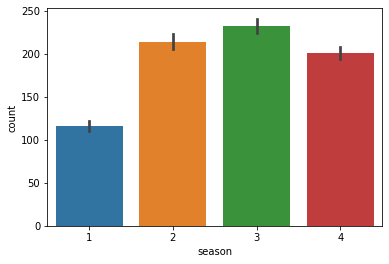

In [14]:
#season holiday workingday weather
sns.boxplot(x="season",y="count",data=train_data)
plt.show()
sns.barplot(x="season",y="count",data=train_data)

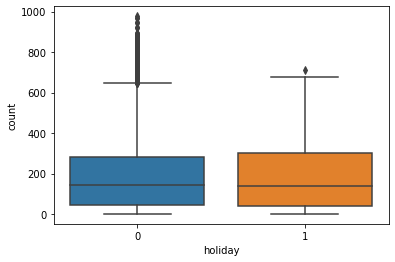

<AxesSubplot:xlabel='holiday', ylabel='count'>

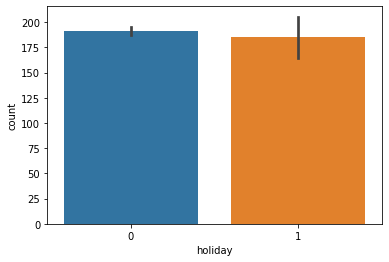

In [15]:
sns.boxplot(x="holiday",y="count",data=train_data)
plt.show()
sns.barplot(x="holiday",y="count",data=train_data)

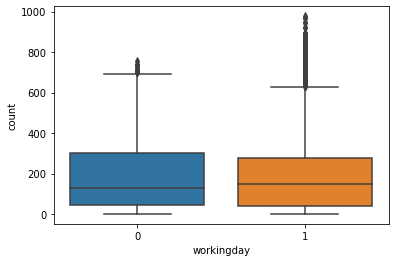

<AxesSubplot:xlabel='workingday', ylabel='count'>

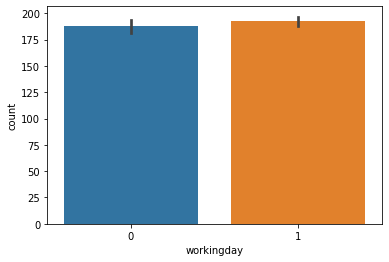

In [16]:
sns.boxplot(x="workingday",y="count",data=train_data)
plt.show()
sns.barplot(x="workingday",y="count",data=train_data)

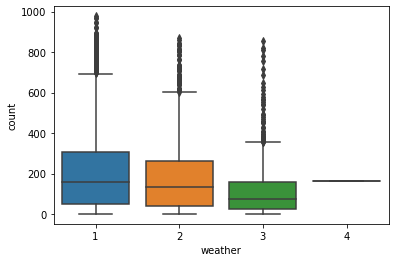

<AxesSubplot:xlabel='weather', ylabel='count'>

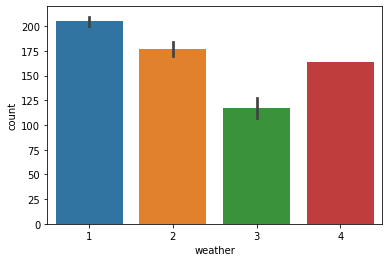

In [17]:
sns.boxplot(x="weather",y="count",data=train_data)
plt.show()
sns.barplot(x="weather",y="count",data=train_data)

<AxesSubplot:>

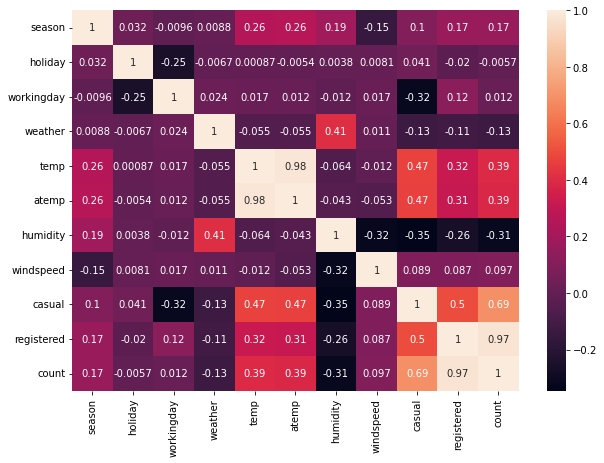

In [18]:
### corrleation
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

## 3- Data preparation and cleaning 
## from the eda we find that 
## 1- count have outliers and right skewed we want tearmenat that 
## 2- we want change scale of numerical column 
## 3- we can split datecolumn into (year-month-week-day-hour)


In [19]:
## converr date time column 
train_data["datetime"]=pd.to_datetime(train_data["datetime"])
val_data["datetime"]=pd.to_datetime(val_data["datetime"])
test_data["datetime"]=pd.to_datetime(test_data["datetime"])

In [20]:
### create function to splite datatime into year month day day of week hour 
def split_datetime(df):
    df["year"]=df["datetime"].apply([lambda t:t.year])
    df["month"]=df["datetime"].apply([lambda t:t.month])
    df["day"]=df["datetime"].apply([lambda t:t.day])
    df["dayofweek"]=df["datetime"].apply([lambda t:t.dayofweek])
    df["hour"]=df["datetime"].apply([lambda t:t.hour])
    df.drop(["datetime"],axis=1,inplace=True)
    return df

In [21]:
#### use function with data sets 
split_datetime(train_data)
split_datetime(val_data)
split_datetime(test_data)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,0,19
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,0,20
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,0,21
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,0,22


In [22]:
### drop casual registered from train and val data 
#train_data.drop(["casual","registered"],axis=1,inplace=True)
#val_data.drop(["casual","registered"],axis=1,inplace=True)


In [23]:
train_data.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
3662,3,0,0,1,28.70,32.575,61,15.0013,97,160,257,2011,9,3,5,12
8648,3,0,1,1,33.62,38.635,52,16.9979,90,775,865,2012,8,2,3,17
7053,2,0,1,1,12.30,14.395,65,16.9979,2,94,96,2012,4,12,3,6
2685,2,0,0,1,29.52,34.090,62,8.9981,94,217,311,2011,6,19,6,19
5927,1,0,1,1,10.66,12.880,60,15.0013,0,2,2,2012,2,3,4,4


<AxesSubplot:xlabel='hour', ylabel='count'>

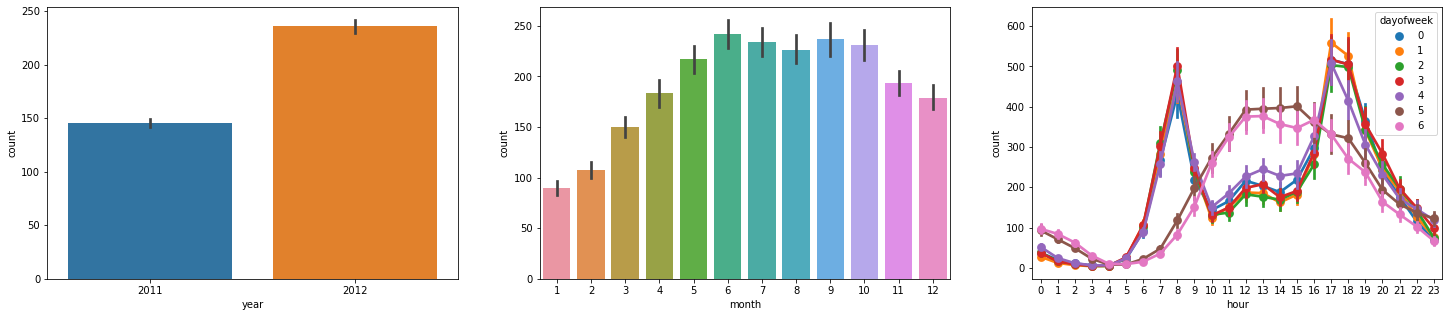

In [24]:
### analysis date time which year have more count which month which hour ofdayofweeak 
fig,axes=plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25,5)
sns.barplot(x="year",y="count",data=train_data,ax=axes[0])
sns.barplot(x="month",y="count",data=train_data,ax=axes[1])
sns.pointplot(x="hour",y="count",hue="dayofweek",data=train_data,ax=axes[2])

## from this charts we find that 
## 1- avg of count in 2012 > 2011 
## 2- almostly summer months have highst counts 
## 3- From 3 chart we can notice that at the first day of the week monday at mornig the count is very high and also at the first hour of evining  when people go to work and Back from work 
## sat,sun day this the low days of count(bike sharing) this week end !!

<AxesSubplot:xlabel='count', ylabel='Count'>

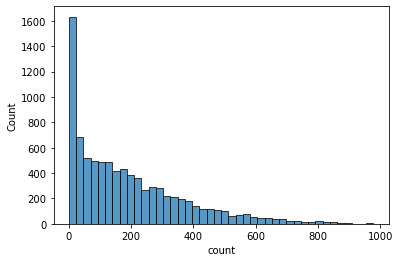

In [25]:
### now i want to look at count skewed 
sns.histplot(x="count",data=train_data)

<AxesSubplot:xlabel='count', ylabel='Count'>

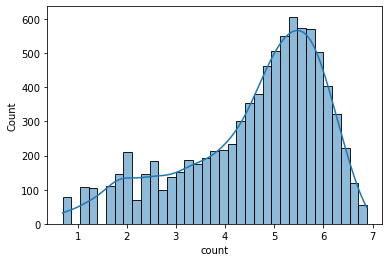

In [26]:
### we can tearmenat it by get log of count 
train_data["count"]=np.log1p(train_data["count"])
val_data["count"]=np.log1p(val_data["count"])

sns.histplot(x="count",data=train_data,kde=True)

<AxesSubplot:xlabel='count', ylabel='Count'>

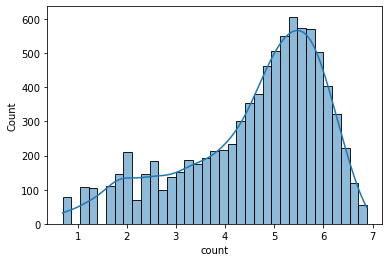

In [27]:
## rremove outlier more than 3 std 
from scipy.stats import zscore 
train_data=train_data[abs(zscore(train_data['count']))<3]
val_data=val_data[abs(zscore(val_data['count']))<3]
sns.histplot(x="count",data=train_data,kde=True)

<AxesSubplot:xlabel='count'>

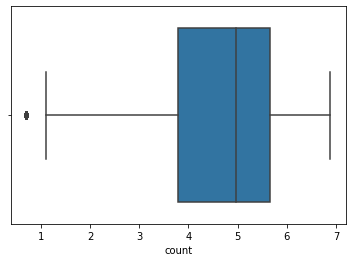

In [28]:
sns.boxplot(x="count",data=train_data)

In [29]:
## let me drop atemp !! 
train_data.drop(["atemp"],axis=1,inplace=True)
val_data.drop(["atemp"],axis=1,inplace=True)
test_data.drop(["atemp"],axis=1,inplace=True)

In [30]:
### scaling of numeric columns 
from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    scaler=MinMaxScaler()
    cols=["temp","humidity","windspeed"]
    df[cols]=scaler.fit_transform(df[cols])
    return df 



In [31]:
scaling(train_data)
scaling(val_data)
scaling(test_data)

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,0.25,0.476190,0.464346,2011,1,20,3,0
1,1,0,1,1,0.25,0.476190,0.000000,2011,1,20,3,1
2,1,0,1,1,0.25,0.476190,0.000000,2011,1,20,3,2
3,1,0,1,1,0.25,0.476190,0.196458,2011,1,20,3,3
4,1,0,1,1,0.25,0.476190,0.196458,2011,1,20,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,0.25,0.523810,0.196458,2012,12,31,0,19
6489,1,0,1,2,0.25,0.523810,0.196458,2012,12,31,0,20
6490,1,0,1,1,0.25,0.523810,0.196458,2012,12,31,0,21
6491,1,0,1,1,0.25,0.476190,0.160684,2012,12,31,0,22


In [32]:
train_data=pd.get_dummies(train_data,columns=['season'],prefix=['season'])
val_data=pd.get_dummies(val_data,columns=['season'],prefix=['season'])
test_data=pd.get_dummies(test_data,columns=['season'],prefix=['holiday'])
train_data=pd.get_dummies(train_data,columns=['holiday'],prefix=['holiday'])
val_data=pd.get_dummies(val_data,columns=['holiday'],prefix=['holiday'])
test_data=pd.get_dummies(test_data,columns=['holiday'],prefix=['holiday'])
train_data=pd.get_dummies(train_data,columns=['workingday'],prefix=['workingday'])
val_data=pd.get_dummies(val_data,columns=['workingday'],prefix=['workingday'])
test_data=pd.get_dummies(test_data,columns=['workingday'],prefix=['workingday'])

train_data=pd.get_dummies(train_data,columns=['year'],prefix=['year'])
val_data=pd.get_dummies(val_data,columns=['year'],prefix=['year'])
test_data=pd.get_dummies(test_data,columns=['year'],prefix=['year'])

train_data=pd.get_dummies(train_data,columns=['month'],prefix=['month'])
val_data=pd.get_dummies(val_data,columns=['month'],prefix=['month'])
test_data=pd.get_dummies(test_data,columns=['month'],prefix=['month'])

train_data=pd.get_dummies(train_data,columns=['hour'],prefix=['hour'])
val_data=pd.get_dummies(val_data,columns=['hour'],prefix=['hour'])
test_data=pd.get_dummies(test_data,columns=['hour'],prefix=['hour'])

train_data.drop(["day","dayofweek"],axis=1,inplace=True)
val_data.drop(["day","dayofweek"],axis=1,inplace=True)
test_data.drop(["day","dayofweek"],axis=1,inplace=True)


<AxesSubplot:xlabel='windspeed', ylabel='count'>

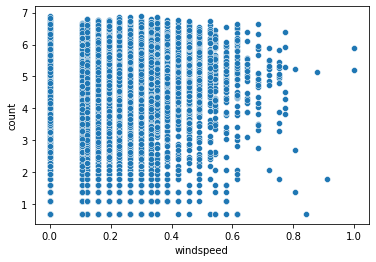

In [33]:
sns.scatterplot(x="windspeed",y="count",data=train_data)

In [34]:
### cliping 
train_data.loc[train_data["windspeed"]>.6,"windspeed"]=.6

<AxesSubplot:xlabel='windspeed', ylabel='count'>

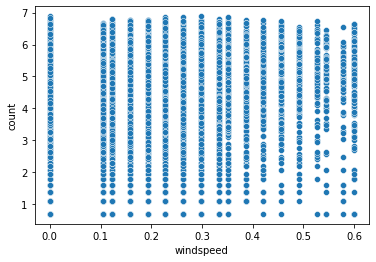

In [35]:
sns.scatterplot(x="windspeed",y="count",data=train_data)

In [36]:
### weather column
train_data["weather"].value_counts()

1    5772
2    2273
3     662
4       1
Name: weather, dtype: int64

In [37]:
## we can use cliping to make 4 3
train_data.loc[train_data["weather"]==4,"weather"]=3

In [38]:
train_data["weather"].value_counts()

1    5772
2    2273
3     663
Name: weather, dtype: int64

In [39]:
train_data.head(5)

,weather,temp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
3662,1,0.693878,0.61,0.263195,97,160,5.552960,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8648,1,0.816327,0.52,0.298225,90,775,6.763885,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7053,1,0.285714,0.65,0.298225,2,94,4.574711,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2685,1,0.714286,0.62,0.157870,94,217,5.743003,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5927,1,0.244898,0.60,0.263195,0,2,1.098612,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
val_x=val_data.drop(["count","registered","casual","windspeed"],axis=1)
val_y=val_data["count"]
val_x

,weather,temp,humidity,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
6638,1,0.595745,0.56,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7975,2,0.680851,0.89,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5915,1,0.468085,0.55,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8050,1,0.723404,0.42,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5894,1,0.553191,0.52,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2,0.425532,0.88,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5519,1,0.191489,0.51,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8217,2,0.893617,0.30,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5916,1,0.425532,0.54,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## model selection

# 1- Linear Regression

In [41]:
### split data 
train_x=train_data.drop(["count","registered","casual","windspeed"],axis=1)
train_y=train_data["count"]


### linear regression model
from sklearn.linear_model import LinearRegression 
mlrm=LinearRegression()
mlrm.fit(train_x,train_y)
mlrm.score(train_x,train_y)*100

82.91720630714829

In [42]:
mlrm.score(val_x,val_y)*100

82.52387528229286

In [43]:
y_train_predict =mlrm.predict(train_x)
y_val_predict=mlrm.predict(val_x)

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(train_y,y_train_predict)

0.018973165173834464

In [44]:
test_data=test_data.drop(["windspeed"],axis=1)

In [46]:
test_predict=mlrm.predict(test_data)

C:\Users\ALNOUR\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- holiday_2
- holiday_3
- holiday_4
Feature names seen at fit time, yet now missing:
- season_1
- season_2
- season_3
- season_4

  warnings.warn(message, FutureWarning)


In [47]:
test_predict

array([2.88256836e+00, 2.28247070e+00, 1.77319336e+00, ...,
       7.25349003e+11, 7.25349003e+11, 7.25349003e+11])

In [48]:
y_test=pd.DataFrame(test_predict)
datetime=pd.DataFrame(test_data2["datetime"])
submm=pd.concat([datetime,y_test],axis=1)
submm.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\submmlr7.csv",index=False)

## DecisionTreeRegressor

In [49]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


dt=DecisionTreeRegressor()
dt.fit(train_x,train_y)
dt.score(train_x,train_y)*100

99.9021158444838

In [50]:
dt.score(val_x,val_y)*100

88.88297619795496

In [51]:
y_train_predict =dt.predict(train_x)
y_val_predict=dt.predict(val_x)

from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(train_y,y_train_predict)

0.00015637707359659022

In [52]:
test_dt_predict=dt.predict(test_data)
test_dt_predict

C:\Users\ALNOUR\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- holiday_2
- holiday_3
- holiday_4
Feature names seen at fit time, yet now missing:
- season_1
- season_2
- season_3
- season_4

  warnings.warn(message, FutureWarning)


array([2.77258872, 1.79175947, 1.09861229, ..., 4.58496748, 4.51085951,
       4.04305127])

In [53]:
test_data2['datetime'] = pd.to_datetime(test_data2['datetime'])

In [54]:
y_test=pd.DataFrame(test_dt_predict)
datetime=pd.DataFrame(test_data2["datetime"])
submm=pd.concat([datetime,y_test],axis=1)
submm.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\submmdt12.csv",index=False)

## RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor(n_estimators=100)

# Train the model on the training data
rf.fit(train_x, train_y)

# Make predictions on the testing data
y_pred = rf.predict(val_x)

from sklearn.metrics import mean_squared_log_error
print("the mean_squared_log_error is of val : ", mean_squared_log_error(val_y, y_pred))
# Calculate the mean squared error of the predictions
mse = mean_squared_error(val_y, y_pred)
print("Mean squared error: ", mse)

the mean_squared_log_error is of val :  0.009646632003329297
Mean squared error:  0.1320028712021679


In [62]:
rf.score(train_x,train_y)*100

99.11995159421784

In [63]:
rf.score(val_x,val_y)*100

93.6482799305325

In [65]:
y_pred = rf.predict(test_data)

C:\Users\ALNOUR\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- holiday_2
- holiday_3
- holiday_4
Feature names seen at fit time, yet now missing:
- season_1
- season_2
- season_3
- season_4

  warnings.warn(message, FutureWarning)


In [66]:
y_test=pd.DataFrame(y_pred)
datetime=pd.DataFrame(test_data2["datetime"])
submm=pd.concat([datetime,y_test],axis=1)
submm.to_csv(r"D:\ITI_DATA_Analysis\Ml\Project\Data Set2 Bike Sharng\submmdRRF5.csv",index=False)

## the best model is Random forest model 